# SBD MSG Location Plotter

In [3]:
import pandas as pd

#%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import cmocean

In [4]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8,4),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        ax.xaxis.set_major_formatter = LongitudeFormatter
        ax.yaxis.set_major_formatter = LatitudeFormatter
        gl.ylabel_style = {'size': 10, 'color': 'blue'}
        gl.xlabel_style = {'size': 10, 'color': 'blue'}
    return fig, ax

In [ ]:
# comment below to do all id's
# 2018 - 300434063925210 - M5 : Inactive
# 2018 - 300434063823800 - C10/C11 Popup 102 : Active
# 2018 - 300434063921240 - C2 Popup 101 : Active
# 2018 - 300434063928220 - Popup 103 : Inactive

#instid = '300434063823800'
#file = instid+'/message_position_2019.csv'
#df = pd.read_csv(file,
                 #parse_dates=True,index_col='datetime')

NameError: name 'df' is not defined

C:\Users\donohoe\AppData\Local\Continuum\anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


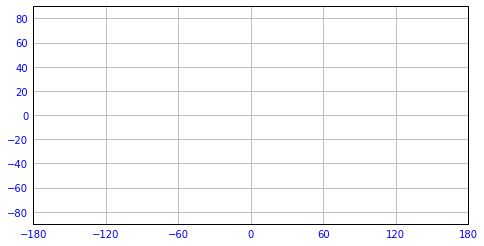

In [5]:
projection=ccrs.PlateCarree()
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

extent = [-175, -150, 55, 75]
fig,ax = make_map(projection=projection)

ax.scatter(df['longitude'], df['latitude'], s=1,
           c=df.index.dayofyear, cmap=cmocean.cm.gray,
           transform=transformation)

leg = ax.legend()

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

NameError: name 'df' is not defined

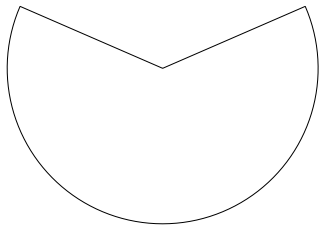

In [6]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

extent = [-200, -160, 65, 74]
fig,ax = make_map(projection=projection)

sm=ax.scatter(df['longitude'], df['latitude'], s=1,
           c=df.index.dayofyear, cmap=cmocean.cm.gray,
           transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)
plt.colorbar(sm,ax=ax,label='DOY')

In [ ]:
fig.savefig(file.replace('csv','png'),dpi=300)

### and using SST location information

In [ ]:
file = instid+'/2019/'+instid+'_sst_data.csv'
df = pd.read_csv(file,
                 parse_dates=True,index_col='datetime')


In [ ]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

extent = [-180, -150, 65, 74]
fig,ax = make_map(projection=projection)

sm=ax.scatter(df['GPSLon'], df['GPSLat'], s=1,
           c=df.index.dayofyear, cmap=cmocean.cm.gray,
           transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)
plt.colorbar(sm,ax=ax,label='DOY')

In [ ]:
fig.savefig(file.replace('.csv','GPSmap.png'),dpi=300)